# EDA: PHÂN TÍCH ĐƠN BIẾN

**Phân tích đơn biến** là một phương pháp cơ bản trong phân tích dữ liệu, liên quan đến việc nghiên cứu và tổng hợp một biến duy nhất tại một thời điểm. Nó giúp chúng ta hiểu về phân phối, trung bình và biến đổi của từng biến trong tập dữ liệu.

Trong Jupyter Notebook này, chúng ta sẽ tiến hành **phân tích đơn biến** trên **bộ dữ liệu Iris**. Bộ dữ liệu Iris là một bộ dữ liệu nổi tiếng, chứa thông tin về bốn thuộc tính: chiều dài đài hoa, chiều rộng đài hoa, chiều dài cánh hoa và chiều rộng cánh hoa, cho ba loại hoa iris khác nhau: setosa, versicolor và virginica. Mục tiêu của phân tích này là khám phá từng thuộc tính một cách độc lập và biểu đạt đặc điểm của chúng bằng cách sử dụng nhiều loại biểu đồ khác nhau.

Trong suốt notebook này, sẽ hướng dẫn bạn qua một số bài tập, mỗi bài tập tập trung vào một khía cạnh cụ thể của phân tích đơn biến:
1. Vẽ biểu đồ histogram về chiều dài đài hoa.
2. Tạo biểu đồ hộp (box plot) cho chiều rộng cánh hoa.
3. Tạo biểu đồ mật độ ước tính hạt nhân (KDE) cho chiều rộng đài hoa.
4. Tạo biểu đồ đếm cho biến "target".
5. Xây dựng biểu đồ violon cho chiều dài cánh hoa.

Hãy cùng bắt đầu với các bài tập và khám phá những thông tin ẩn trong bộ dữ liệu Iris!


### 1. Tải dữ liệu

In [1]:
# Import những thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from PIL import Image
from io import BytesIO

In [ ]:
# Tải dữ liệu hoa Iris
iris = load_iris()

df = pd.DataFrame(
    data=np.c_[iris["data"], iris["target"]],
    columns=iris["feature_names"] + ["target"] # ghép nối cột mới
)
# Xem qua dữ liệu
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### 2. Bài tập vẽ biểu đồ

# tổng vẽ biểu đồ

**Bài tập**: Hãy sử dụng thư viện sns để tạo một histogram đối với feature ***sepal length (cm)***
với các tham số như sau:

- ***figsize***: (8, 6)
- ***title***: "Histogram of Sepal Length"
- ***xlabel***: "Sepal Length (cm)"
- ***ylable***: "Frequency"

Lưu ý: Không thêm bất kỳ tùy chỉnh nào khác cho biểu đồ để thuận tiện cho việc chấm tự động.

<details>
<summary><strong>Phân biệt Histogram và Bar chart</strong></summary>

### Histogram (sns.histplot)

- Dùng cho dữ liệu liên tục
- Tự động chia bins
- Chiều cao cột = số điểm trong mỗi khoảng

### Bar chart (plt.bar)

- Dữ liệu rời rạc / đã tổng hợp
- Phải tự cung cấp height
- `plt.bar` không tự đếm


Khám phá dữ liệu ban đầu (EDA) → Histogram

Khi đã có số liệu tổng hợp (report, dashboard) → Bar chart

Trong ML/AI: histogram rất quan trọng để

phát hiện lệch phân phối

kiểm tra chuẩn hóa

xem outlier
</details>


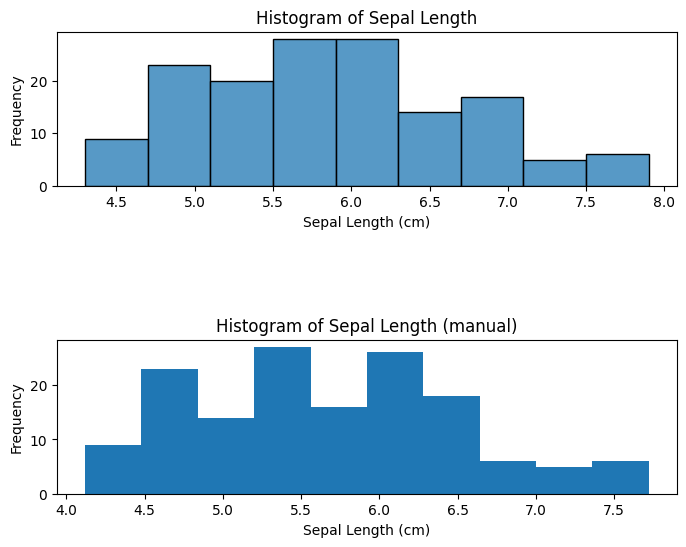

In [ ]:
plt.figure(figsize=(8, 6))

### BEGIN SOLUTION
plt.subplot(211)
sns.histplot(data= df, x= 'sepal length (cm)')

plt.title("Histogram of Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")

# tự làm thêm
plt.subplot(212)

counts, bins = np.histogram(df['sepal length (cm)'], bins=10) # bins số khoảng để chia dựa vào dữ liệu đầu vào
# counts là số điểm dữ liệu trong bins được chia,  bins chứa mốc biên, độ dài = 11 
#vd counts = [5, 11, 23, 35, 30, 20, 15, 7, 3, 1], bins = [4.3, 4.66, 5.02, ..., 7.9]Nếu không cắt [:-1] → lệch chiều → lỗi
plt.bar(bins[:-1], counts, width=bins[1]-bins[0])
# -1 là bỏ biên bên phải -> cột x, counts là cột y, 
plt.title("Histogram of Sepal Length (manual)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")

plt.subplots_adjust(hspace=1)
### END SOLUTION

plt.savefig('part_1.png')

**Bài tập**: Hãy sử dụng thư viện sns để tạo một box plot đối với feature ***petal width (cm)***
với các tham số như sau:

- ***figsize***: (8, 6)
- ***title***: "Box Plot of Petal Width"
- ***ylable***: "Petal Width (cm)"

Lưu ý: Không thêm bất kỳ tùy chỉnh nào khác cho biểu đồ để thuận tiện cho việc chấm tự động.

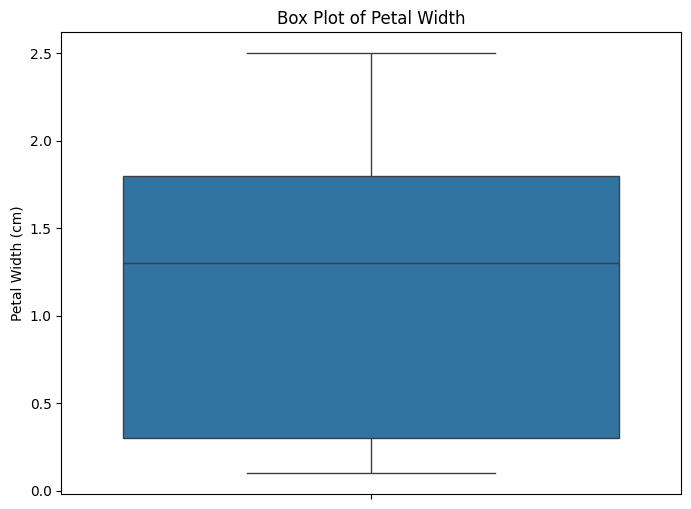

In [12]:
plt.figure(figsize=(8, 6))

### BEGIN SOLUTION
sns.boxplot(data=df, y='petal width (cm)')
plt.title( "Box Plot of Petal Width")
plt.ylabel("Petal Width (cm)")

### END SOLUTION

plt.savefig('part_2.png')

**Bài tập**: Hãy sử dụng thư viện seaborn để tạo một kernel density plot (kde) đối với feature ***sepal width (cm)*** với các tham số như sau:

- ***figsize***: (8, 6)
- ***title***: "Kernel Density Estimate of Sepal Width"
- ***xlabel***: "Sepal Width (cm)"
- ***ylabel***: "Density"

Lưu ý: Không thêm bất kỳ tùy chỉnh nào khác cho biểu đồ để thuận tiện cho việc chấm tự động.

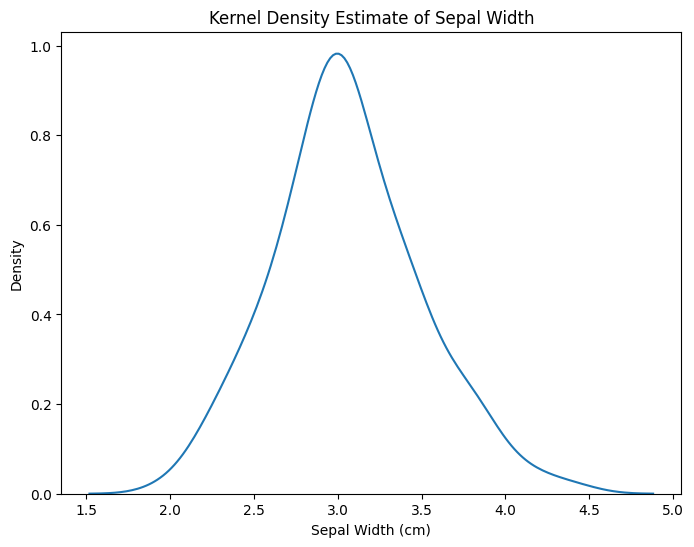

In [22]:
plt.figure(figsize=(8, 6))

### BEGIN SOLUTION
sns.kdeplot(data=df, x='sepal width (cm)')
plt.title("Kernel Density Estimate of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Density")


### END SOLUTION

plt.savefig('part_3.png')

**Bài tập**: Hãy sử dụng thư viện seaborn để tạo count plot đối với feature ***target***
với các tham số như sau:
- ***figsize***: (8, 6)
- ***title***: "Count Plot of Target Classes"
- ***xlabel***: "Target Class"
- ***ylabel***: "Count"
Lưu ý: Không thêm bất kỳ tùy chỉnh nào khác cho biểu đồ để thuận tiện cho việc chấm tự động.

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: target, Length: 150, dtype: bool


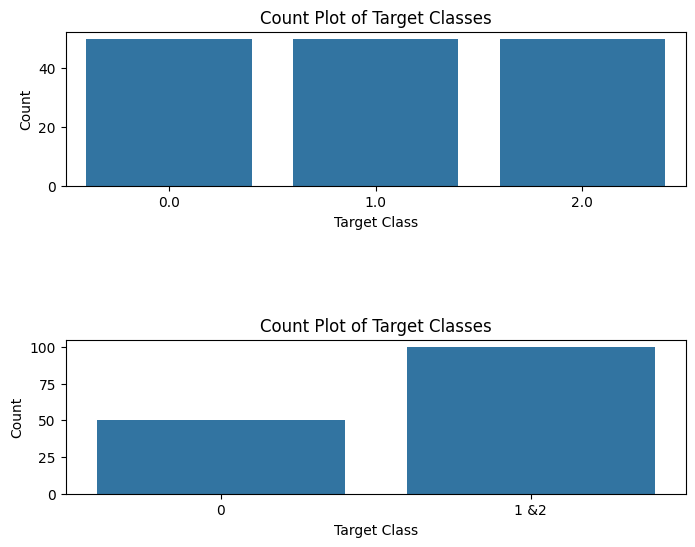

In [21]:
plt.figure(figsize=(8, 6))

### BEGIN SOLUTION
plt.subplot(211)
sns.countplot(data=df, x='target') # truy vấn thẳng feature, df['target] chỉ trong trường hợp đó là data khác, hay dùng plt thuần , dữ liệu không có data, biến được xử lý dữ liệu 
plt.title( "Count Plot of Target Classes")
plt.ylabel("Count")
plt.xlabel("Target Class")

plt.subplot(212)
# xử lý dữ liệu
sns.countplot(data=df, x=df['target']>0)
plt.title( "Count Plot of Target Classes")
plt.ylabel("Count")
plt.xlabel("Target Class")
print(df['target']>0) # đả chuyển thành true false
plt.xticks([0,1], labels=('0', '1 &2')) # chỉ truyền vào giá trị tại cột x và biến đổi tên nó
plt.subplots_adjust(hspace=1)
### END SOLUTION

plt.savefig('part_4.png')

**Bài tập**: Hãy sử dụng thư viện seaborn để tạo violin plot cho feature ***petal length*** cho mỗi feature ***target*** với các tham số như sau:

- ***figsize***: (8, 6)
- ***title***: "Violin Plot of Petal Length"
- ***ylabel***: "Petal Length (cm)"

Lưu ý: Không thêm bất kỳ tùy chỉnh nào khác cho biểu đồ để thuận tiện cho việc chấm tự động.

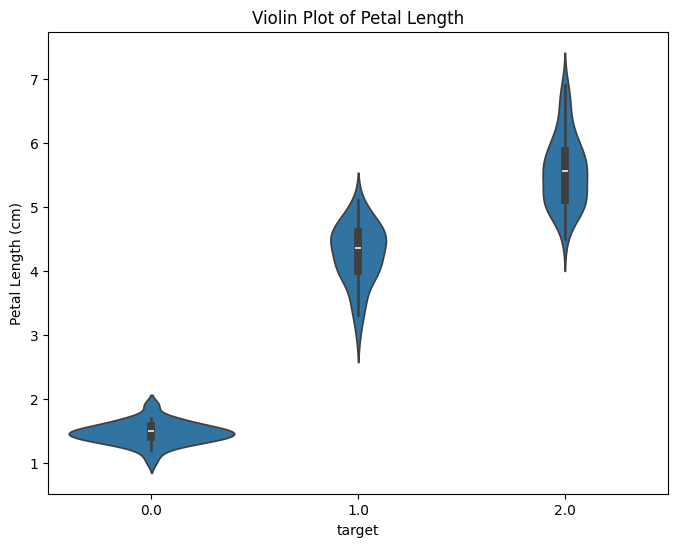

In [ ]:
plt.figure(figsize=(8, 6))

### BEGIN SOLUTION
sns.violinplot(data=df, x='target', y='petal length (cm)')
plt.title("Violin Plot of Petal Length")
plt.ylabel("Petal Length (cm)")


### END SOLUTION

plt.savefig('part_5.png')

# Bài Tập Để Kiểm Tra Hiểu Biết

Chúng ta đã hoàn thành các bước phân tích đơn biến trên bộ dữ liệu Iris. Hãy thử kiểm tra hiểu biết của bạn bằng cách trả lời câu hỏi sau:

1. Phân tích đơn biến liên quan đến việc nghiên cứu:

   a) Một biến duy nhất

   b) Hai biến liên quan

   c) Nhiều biến cùng lúc


2. Biểu đồ nào thường được sử dụng để biểu diễn phân phối của một biến số?

   a) Biểu đồ hộp (box plot)

   b) Biểu đồ violin

   c) Biểu đồ histogram

3. Biểu đồ nào thể hiện mật độ ước tính hạt nhân của một biến số?

   a) Biểu đồ hộp (box plot)

   b) Biểu đồ violin

   c) Biểu đồ KDE (kernel density estimate)

4. Để biểu thị số lượng mẫu thuộc từng lớp trong bộ dữ liệu phân loại, ta sử dụng loại biểu đồ nào?

   a) Biểu đồ hộp (box plot)

   b) Biểu đồ count

   c) Biểu đồ violin

5. Biểu đồ violin thường kết hợp giữa biểu đồ nào và biểu đồ nào?

   a) Histogram và bar plot

   b) Box plot và histogram
   
   c) Box plot và KDE plot


In [13]:
# Trả lời theo định dạng mẫu sau, thay dấu chấm hỏi "?" bằng "a" hoặc "b" hoặc "c" theo lựa chọn của bạn
student_answers = ["b", "b", "b", "b", "b"]

https://chatgpt.com/share/69491fc1-c360-8006-b610-497b945a4ada

Tổng kết: Mỗi dạng biểu đồ cho ta kiến thức gì khi phân tích đơn biến?
❓ Histogram cho ta biết gì?

Histogram trả lời câu hỏi: “Giá trị của biến phân bố như thế nào?”

Thấy được hình dạng phân phối: lệch trái, lệch phải, chuẩn, đa đỉnh

Nhận biết vùng giá trị tập trung nhiều nhất

Phát hiện outlier thô (giá trị rất hiếm)

Rất quan trọng cho:

Giả định phân phối (Gaussian hay không)

Chuẩn bị cho ML (scaling, transform)

👉 Dùng khi bạn quan tâm tần suất và phân phối thô của dữ liệu liên tục.

❓ Box plot cho ta biết gì?

Box plot trả lời câu hỏi: “Dữ liệu trải rộng và lệch ra sao?”

Median (trung vị)

Q1, Q3 → độ phân tán

Outlier rõ ràng

So sánh nhanh giữa các nhóm (nếu có hue)

👉 Dùng khi bạn cần:

Phát hiện outlier chính xác

So sánh phân phối ngắn gọn, súc tích

❓ KDE plot cho ta biết gì?

KDE trả lời câu hỏi: “Xác suất xuất hiện giá trị nằm ở đâu?”

Phân phối mượt (không phụ thuộc bins)

Nhìn rõ xu hướng tổng thể

Phát hiện đa đỉnh tốt hơn histogram

👉 Dùng khi:

Phân tích sâu bản chất phân phối

So sánh nhiều phân phối chồng lên nhau

❓ Count plot cho ta biết gì?

Count plot trả lời câu hỏi: “Mỗi lớp có bao nhiêu mẫu?”

Kiểm tra mất cân bằng lớp

Rất quan trọng cho bài toán classification

Quyết định:

Có cần resampling không

Có bias dữ liệu không

👉 Dùng khi biến là categorical / class label.

❓ Violin plot cho ta biết gì?

Violin plot trả lời câu hỏi:
“Phân phối + mật độ + thống kê mô tả trông như thế nào cùng lúc?”

Kết hợp:

Box plot (median, quartiles)

KDE (mật độ phân phối)

Thấy rõ:

Dữ liệu tập trung ở đâu

Có nhiều đỉnh hay không

👉 Dùng khi:

Muốn nhìn sâu hơn box plot

Trình bày phân tích chuyên nghiệp

Trả lời câu hỏi trắc nghiệm
❓ Câu 1: Phân tích đơn biến liên quan đến việc nghiên cứu:

Đáp án đúng:
✅ a) Một biến duy nhất

❓ Câu 2: Biểu đồ nào thường được sử dụng để biểu diễn phân phối của một biến số?

Đáp án đúng:
✅ c) Biểu đồ histogram

❓ Câu 3: Biểu đồ nào thể hiện mật độ ước tính hạt nhân của một biến số?

Đáp án đúng:
✅ c) Biểu đồ KDE (kernel density estimate)

❓ Câu 4: Để biểu thị số lượng mẫu thuộc từng lớp trong bộ dữ liệu phân loại, ta sử dụng loại biểu đồ nào?

Đáp án đúng:
✅ b) Biểu đồ count

❓ Câu 5: Biểu đồ violin thường kết hợp giữa biểu đồ nào và biểu đồ nào?

Đáp án đúng:
✅ c) Box plot và KDE plot